In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('competitive-data-science-predict-future-sales\sales_train.csv')

In [3]:
item_cat = pd.read_csv('competitive-data-science-predict-future-sales\item_categories.csv')

In [4]:
items = pd.read_csv('competitive-data-science-predict-future-sales\items.csv')

In [5]:
shops = pd.read_csv('competitive-data-science-predict-future-sales\shops.csv')

Let's check the data

- Sales data

In [6]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
sales.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
sales.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [10]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


- Item Categories

In [11]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
item_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [13]:
item_cat.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [14]:
item_cat.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

- Items

In [15]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [17]:
items.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [18]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [19]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


- Shops

In [20]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [21]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [22]:
shops.isna().sum()

shop_name    0
shop_id      0
dtype: int64

In [23]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In sales data the column data is of object type, we need to convert it into datetime first.

In [24]:
import datetime

In [25]:
sales.date=sales.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [27]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


Let's now aggregate to monthly level the required metrics

In [28]:
monthly_sales = sales.groupby(['date_block_num','shop_id','item_id'])['date','item_price','item_cnt_day'].agg({'date':['min','max'],'item_price':'mean','item_cnt_day':'sum'})

C:\Users\samit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [29]:
monthly_sales

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
...                                   ...        ...        ...          ...
33             59      22087   2015-10-05 2015-10-23      119.0          6.0
                       22088   2015-10-03 2015-10-27      119.0          2.0
                       22091   2015-10-03 2015-10-03      179.0          1.0
                       22100   2015-10-18 2015-10-18      629.0          1.0
                       22102   2015-10-16 2015-10-16     1250.0          1.0

[1609124 rows x 4 columns]

First predicting the monthly sales.

In [30]:
ts = sales.groupby(['date_block_num'])['item_cnt_day'].sum()

In [31]:
ts

date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     71056.0
Name: item_cnt_day, dtype: float64

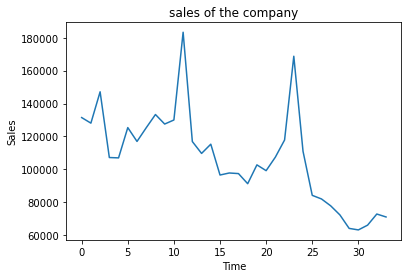

In [32]:
plt.title('sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.show()

We can clearly see that there is an obvious seasonality and  decreasing trend in our data

The sales seem to rise around the end of the year which makes sense because it is the holiday period.

In [33]:
trend = ts.rolling(window= 12).mean()

In [34]:
seasonality = ts.rolling(window = 12).std()

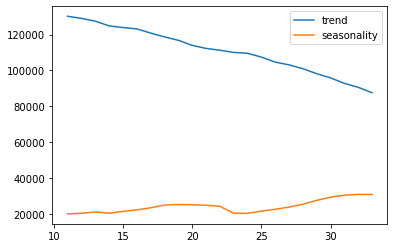

In [35]:
plt.plot(trend, label = 'trend')
plt.plot(seasonality, label = 'seasonality')
plt.legend()
plt.show()

Next checking decompositon into Trend, Seasonality and Residual.

In [36]:
import statsmodels.api as sm

Additive model

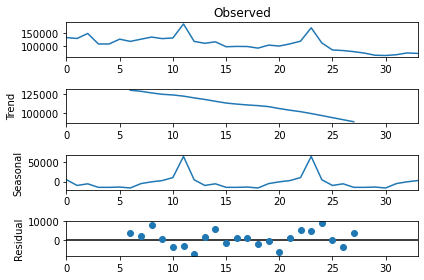

In [37]:
residual = sm.tsa.seasonal_decompose(ts.values,'additive',period=12)

fig = residual.plot()

Multiplicative model

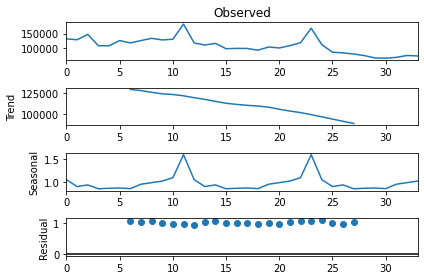

In [38]:
residual = sm.tsa.seasonal_decompose(ts.values,'multiplicative',period=12)

fig = residual.plot()

Performing Dicky-Fuller test for stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


Now creating a function which will help us remove trend and seasonality by taking the difference.

In [41]:
from pandas import Series as Series

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

A function to inverse the differenced value

In [42]:
def inverse_difference(last_ob, value):
    return value + last_ob

Let's use our function to plot the de-trend and de-seasonalized version of our data.

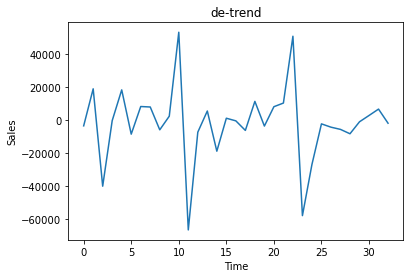

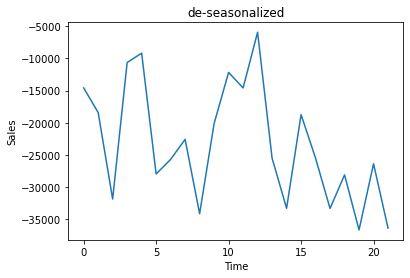

In [43]:
plt.title('de-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts = difference(ts)
plt.plot(new_ts)
plt.show()
plt.title('de-seasonalized')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts = difference(ts,12)
plt.plot(new_ts)
plt.show()

In [44]:
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -3.270101
p-value                         0.016269
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [45]:
new_ts

0    -14580.0
1    -18403.0
2    -31845.0
3    -10634.0
4     -9180.0
5    -27952.0
6    -25686.0
7    -22570.0
8    -34124.0
9    -20119.0
10   -12164.0
11   -14587.0
12    -5928.0
13   -25489.0
14   -33283.0
15   -18729.0
16   -25495.0
17   -33315.0
18   -28093.0
19   -36642.0
20   -26365.0
21   -36366.0
dtype: float64

In [46]:
ts_train = new_ts[:-3]

In [47]:
ts_test = new_ts[-3:]

In [48]:
ts_train

0    -14580.0
1    -18403.0
2    -31845.0
3    -10634.0
4     -9180.0
5    -27952.0
6    -25686.0
7    -22570.0
8    -34124.0
9    -20119.0
10   -12164.0
11   -14587.0
12    -5928.0
13   -25489.0
14   -33283.0
15   -18729.0
16   -25495.0
17   -33315.0
18   -28093.0
dtype: float64

In [60]:
ts_test

19   -36642.0
20   -26365.0
21   -36366.0
dtype: float64

In [50]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [51]:
x_train,y_train = split_sequence(ts_train, 3)

In [61]:
x_test,y_test = split_sequence(ts_test,3)

In [53]:
import tensorflow as tf

In [54]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [55]:
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))

In [56]:
x_train.shape

(16, 3, 1)

In [57]:
model.fit(x_train, y_train, epochs = 200)

Train on 16 samples
Epoch 1/200
16/16 [==============================] - 1s 63ms/sample - loss: 585759552.0000
Epoch 2/200
16/16 [==============================] - 0s 372us/sample - loss: 582982400.0000
Epoch 3/200
16/16 [==============================] - 0s 310us/sample - loss: 578079360.0000
Epoch 4/200
16/16 [==============================] - 0s 374us/sample - loss: 574198912.0000
Epoch 5/200
16/16 [==============================] - 0s 308us/sample - loss: 570239424.0000
Epoch 6/200
16/16 [==============================] - 0s 375us/sample - loss: 565675392.0000
Epoch 7/200
16/16 [==============================] - 0s 310us/sample - loss: 559531264.0000
Epoch 8/200
16/16 [==============================] - 0s 310us/sample - loss: 555330432.0000
Epoch 9/200
16/16 [==============================] - 0s 374us/sample - loss: 548343744.0000
Epoch 10/200
16/16 [==============================] - 0s 371us/sample - loss: 544267328.0000
Epoch 11/200
16/16 [==============================] - 0s 438

Epoch 90/200
16/16 [==============================] - 0s 374us/sample - loss: 96718680.0000
Epoch 91/200
16/16 [==============================] - 0s 374us/sample - loss: 98142624.0000
Epoch 92/200
16/16 [==============================] - 0s 436us/sample - loss: 98167120.0000
Epoch 93/200
16/16 [==============================] - 0s 374us/sample - loss: 98197344.0000
Epoch 94/200
16/16 [==============================] - 0s 374us/sample - loss: 99735536.0000
Epoch 95/200
16/16 [==============================] - 0s 374us/sample - loss: 99758536.0000
Epoch 96/200
16/16 [==============================] - 0s 312us/sample - loss: 99780920.0000
Epoch 97/200
16/16 [==============================] - 0s 249us/sample - loss: 99800976.0000
Epoch 98/200
16/16 [==============================] - 0s 312us/sample - loss: 99817472.0000
Epoch 99/200
16/16 [==============================] - 0s 374us/sample - loss: 99829496.0000
Epoch 100/200
16/16 [==============================] - 0s 312us/sample - loss: 9

Epoch 179/200
16/16 [==============================] - 0s 312us/sample - loss: 98577728.0000
Epoch 180/200
16/16 [==============================] - 0s 312us/sample - loss: 98563416.0000
Epoch 181/200
16/16 [==============================] - 0s 311us/sample - loss: 98549040.0000
Epoch 182/200
16/16 [==============================] - 0s 311us/sample - loss: 98534608.0000
Epoch 183/200
16/16 [==============================] - 0s 312us/sample - loss: 98520120.0000
Epoch 184/200
16/16 [==============================] - 0s 312us/sample - loss: 98505560.0000
Epoch 185/200
16/16 [==============================] - 0s 312us/sample - loss: 98490960.0000
Epoch 186/200
16/16 [==============================] - 0s 314us/sample - loss: 98476328.0000
Epoch 187/200
16/16 [==============================] - 0s 249us/sample - loss: 98461616.0000
Epoch 188/200
16/16 [==============================] - 0s 249us/sample - loss: 98446864.0000
Epoch 189/200
16/16 [==============================] - 0s 312us/sample